In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('SaaS-Sales1.csv')

In [5]:
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df['Year']=df['Order Date'].str[-4:]

In [7]:
df['Unit Price'] = (df['Sales']-df['Profit'])/df['Quantity']

In [8]:
df1=df.drop(['Order Date','Customer ID','Customer','Country','Row ID','Contact Name','Order ID','City','License','Date Key'],axis = 1)


In [ ]:
df1

In [9]:
def mean_target_encoding(df, target_col, cat_cols):
    for col in cat_cols:
        mean_target = df.groupby(col)[target_col].mean()
        encoded_col = f'{col}_encoded'
        df[encoded_col] = df[col].map(mean_target)
    return df

In [10]:
target_col = 'Discount'
cat_cols = ['Region', 'Subregion', 'Segment','Product','Industry','Year']
df1 = mean_target_encoding(df1, target_col, cat_cols)

In [11]:
df1

,Region,Subregion,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Year,Unit Price,Region_encoded,Subregion_encoded,Segment_encoded,Product_encoded,Industry_encoded,Year_encoded
0,EMEA,UKIR,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136,2022,110.0232,0.141372,0.049250,0.158141,0.211140,0.159947,0.154698
1,EMEA,UKIR,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820,2022,170.7860,0.141372,0.049250,0.158141,0.132518,0.159947,0.154698
2,AMER,NAMER,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714,2022,3.8743,0.109359,0.071001,0.158228,0.132518,0.159947,0.154698
3,EMEA,EU-WEST,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310,2021,268.1217,0.141372,0.213662,0.158141,0.353067,0.159947,0.155609
4,EMEA,EU-WEST,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164,2021,9.9258,0.141372,0.213662,0.158141,0.074704,0.159947,0.155609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA,EU-WEST,Healthcare,SMB,SaaS Connector Pack,25.2480,3,0.20,4.1028,2020,7.0484,0.141372,0.213662,0.158141,0.138349,0.155091,0.158284
9990,AMER,NAMER,Finance,SMB,SaaS Connector Pack,91.9600,2,0.00,15.6332,2023,38.1634,0.109359,0.071001,0.158141,0.138349,0.153644,0.156499
9991,AMER,NAMER,Finance,SMB,Site Analytics,258.5760,2,0.20,19.3932,2023,119.5914,0.109359,0.071001,0.158141,0.154556,0.153644,0.156499
9992,AMER,NAMER,Finance,SMB,Support,29.6000,4,0.00,13.3200,2023,4.0700,0.109359,0.071001,0.158141,0.075128,0.153644,0.156499


In [12]:
df1=df1.drop(['Region','Subregion','Industry','Segment','Product','Year'],axis = 1)


In [ ]:
# df1['Industry'] = df1['Industry'].replace({'Energy' : 1, 'Finance' : 2, "Tech" : 3,"Healthcare" : 4, 'Manufacturing' : 5, "Retail" : 6,"Consumer Products" : 7, 'Misc' : 8, "Transportation" : 9,"Communications" : 10})

In [ ]:
# df2 = pd.get_dummies(df1, columns = ['Segment'], drop_first = True)

### Outlier Analysis

In [13]:
# classified into categories 
num=[]
cat=[]
for i in df1.columns:
    if df1[i].dtype == 'O':
        cat.append(i)
    else:
        num.append(i)

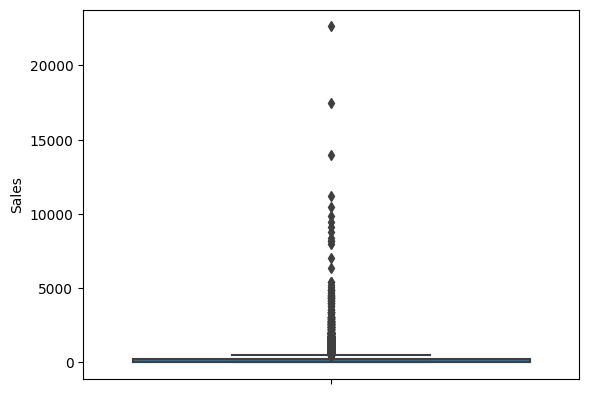

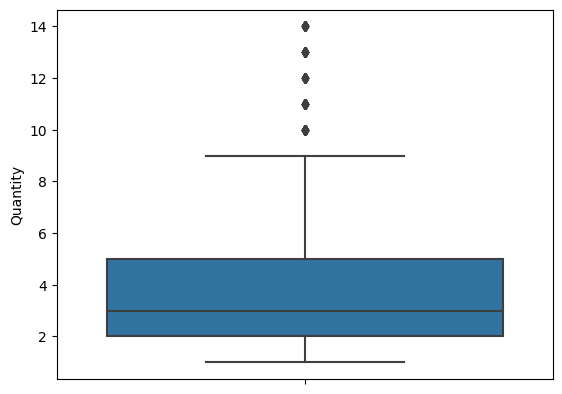

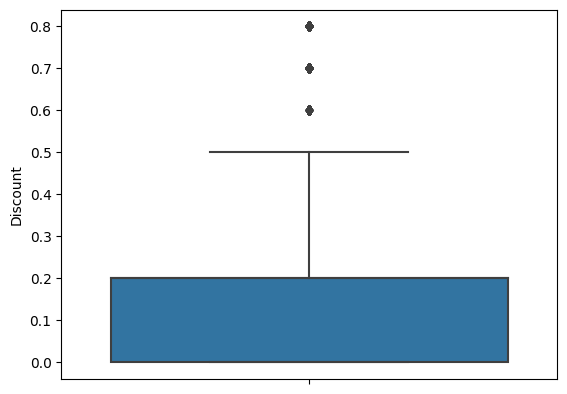

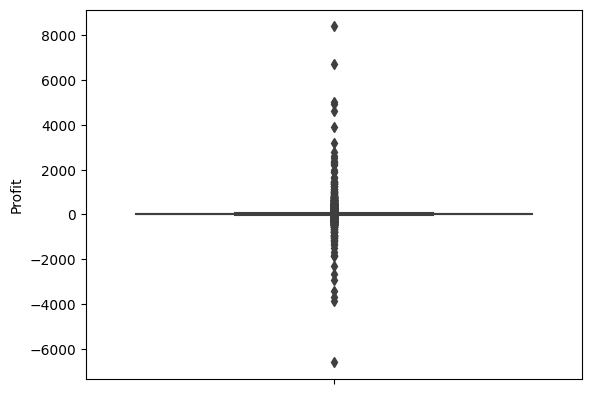

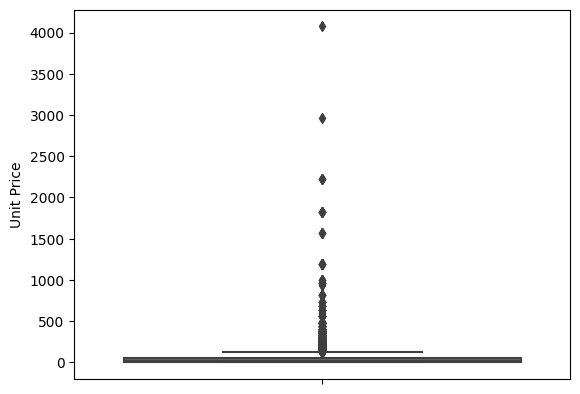

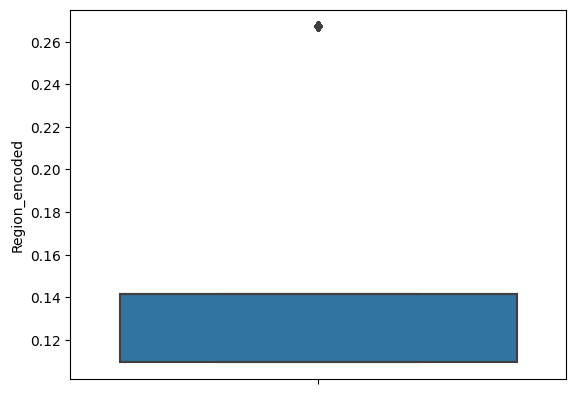

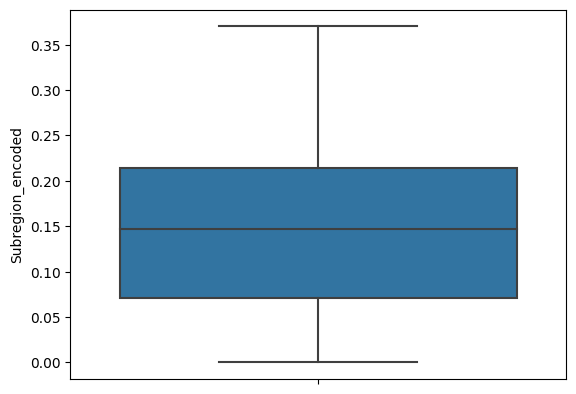

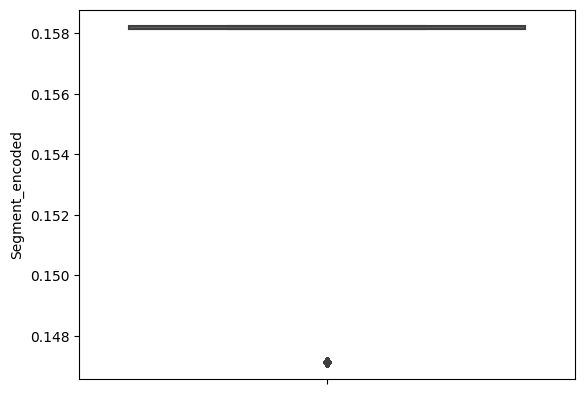

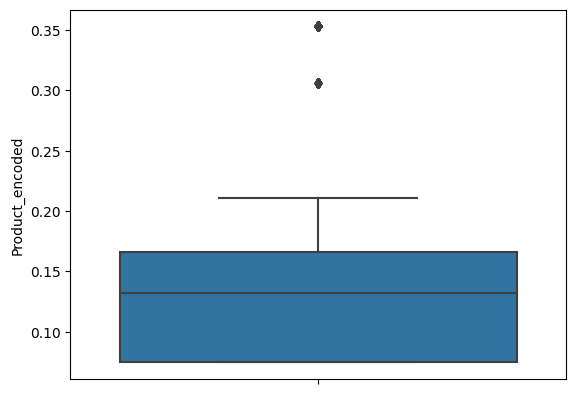

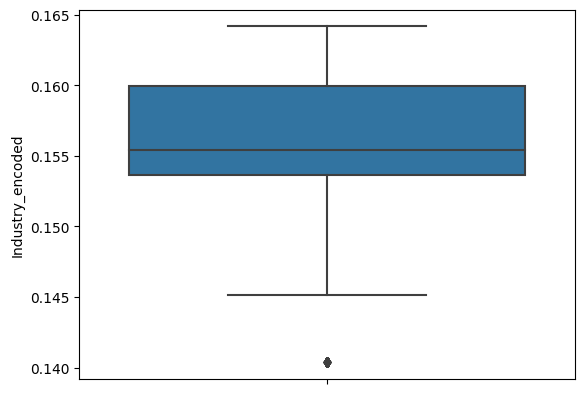

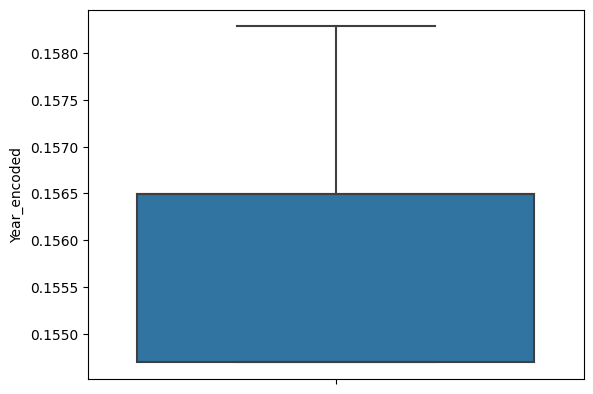

In [15]:
for i in num:
    plt.figure()
    sns.boxplot(y=i,data=df1)

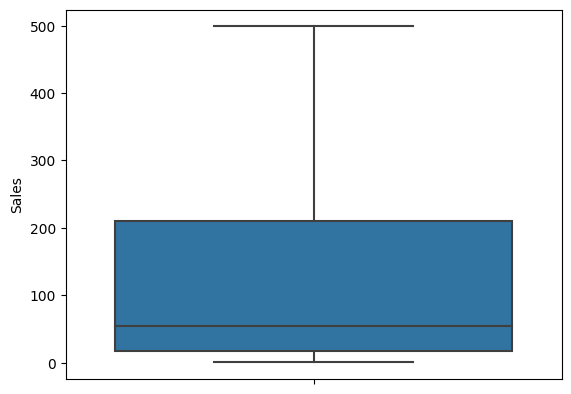

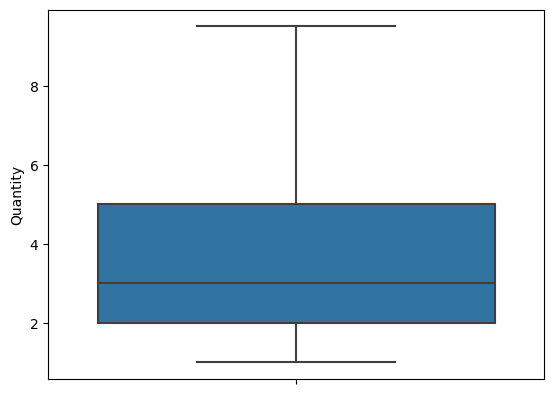

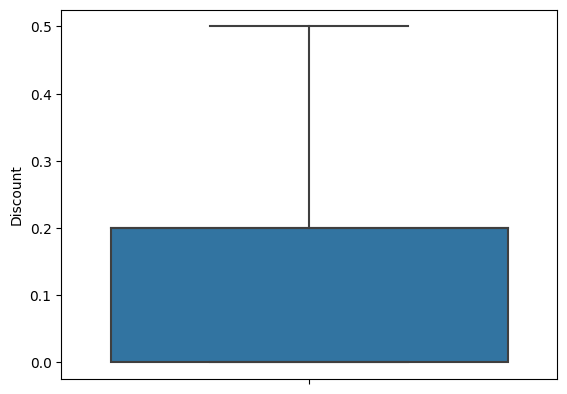

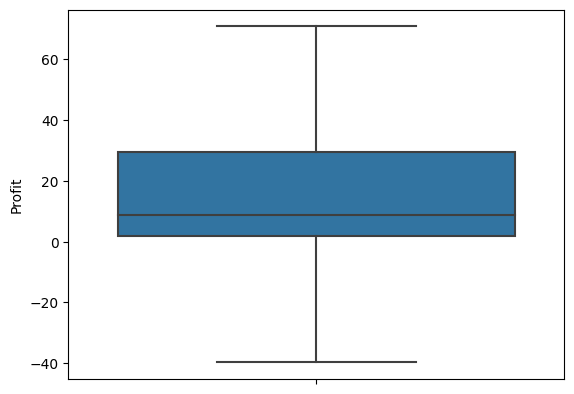

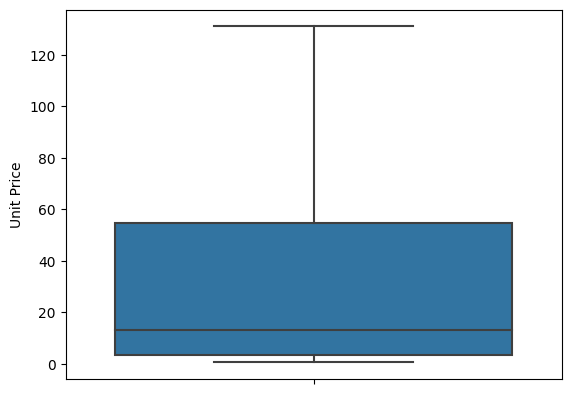

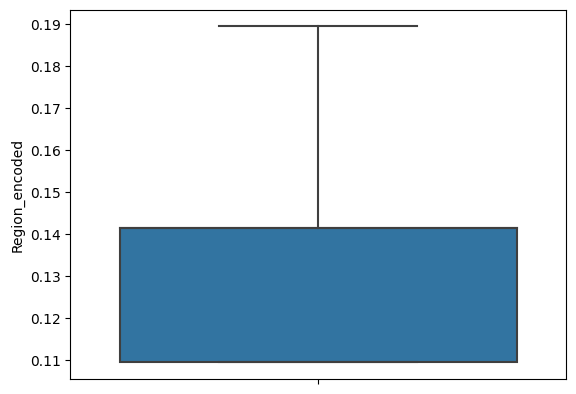

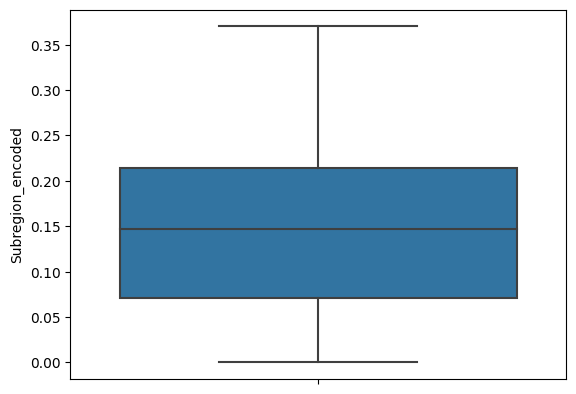

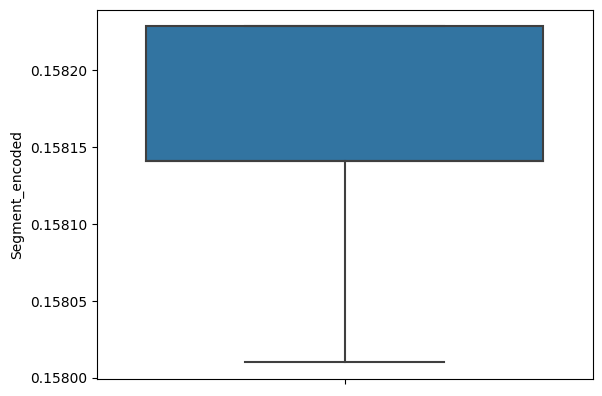

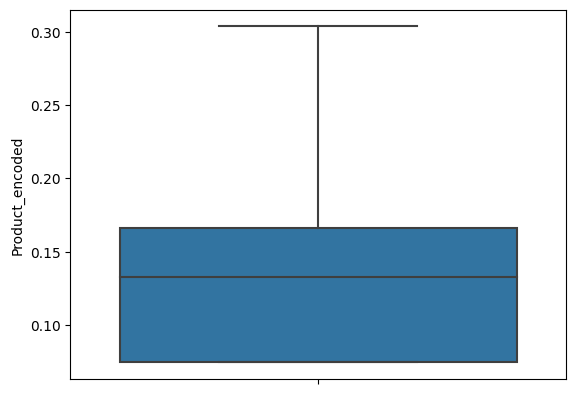

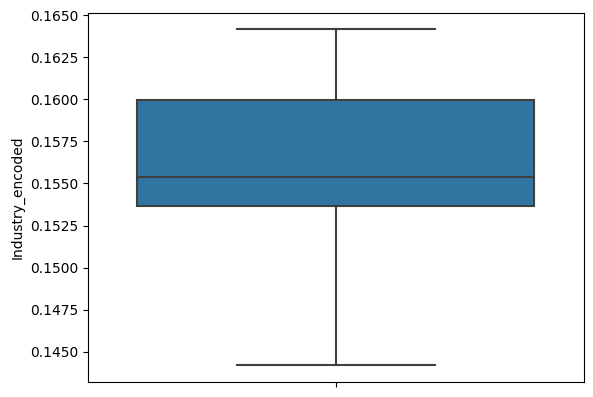

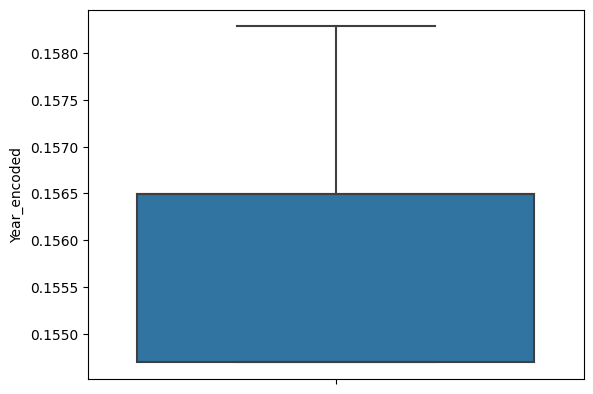

In [16]:
# replaced outlier with lower limit and upper limit
for i in num:
    q1 = df1[i].quantile(0.25)
    q3 = df1[i].quantile(0.75)
    iqr = q3-q1
    ul = q3+ 1.5*iqr
    ll = q1- 1.5*iqr
    df1[i] = np.where(df1[i] < ll, ll, df1[i])
    df1[i] = np.where(df1[i] > ul, ul, df1[i])
    plt.figure()
    sns.boxplot(y=i, data= df1)

In [17]:
df1

,Sales,Quantity,Discount,Profit,Unit Price,Region_encoded,Subregion_encoded,Segment_encoded,Product_encoded,Industry_encoded,Year_encoded
0,261.960,2.0,0.00,41.913600,110.0232,0.141372,0.049250,0.158141,0.211140,0.159947,0.154698
1,498.930,3.0,0.00,70.816875,131.0946,0.141372,0.049250,0.158141,0.132518,0.159947,0.154698
2,14.620,2.0,0.00,6.871400,3.8743,0.109359,0.071001,0.158228,0.132518,0.159947,0.154698
3,498.930,5.0,0.45,-39.724125,131.0946,0.141372,0.213662,0.158141,0.303617,0.159947,0.155609
4,22.368,2.0,0.20,2.516400,9.9258,0.141372,0.213662,0.158141,0.074704,0.159947,0.155609
...,...,...,...,...,...,...,...,...,...,...,...
9989,25.248,3.0,0.20,4.102800,7.0484,0.141372,0.213662,0.158141,0.138349,0.155091,0.158284
9990,91.960,2.0,0.00,15.633200,38.1634,0.109359,0.071001,0.158141,0.138349,0.153644,0.156499
9991,258.576,2.0,0.20,19.393200,119.5914,0.109359,0.071001,0.158141,0.154556,0.153644,0.156499
9992,29.600,4.0,0.00,13.320000,4.0700,0.109359,0.071001,0.158141,0.075128,0.153644,0.156499


<AxesSubplot: >

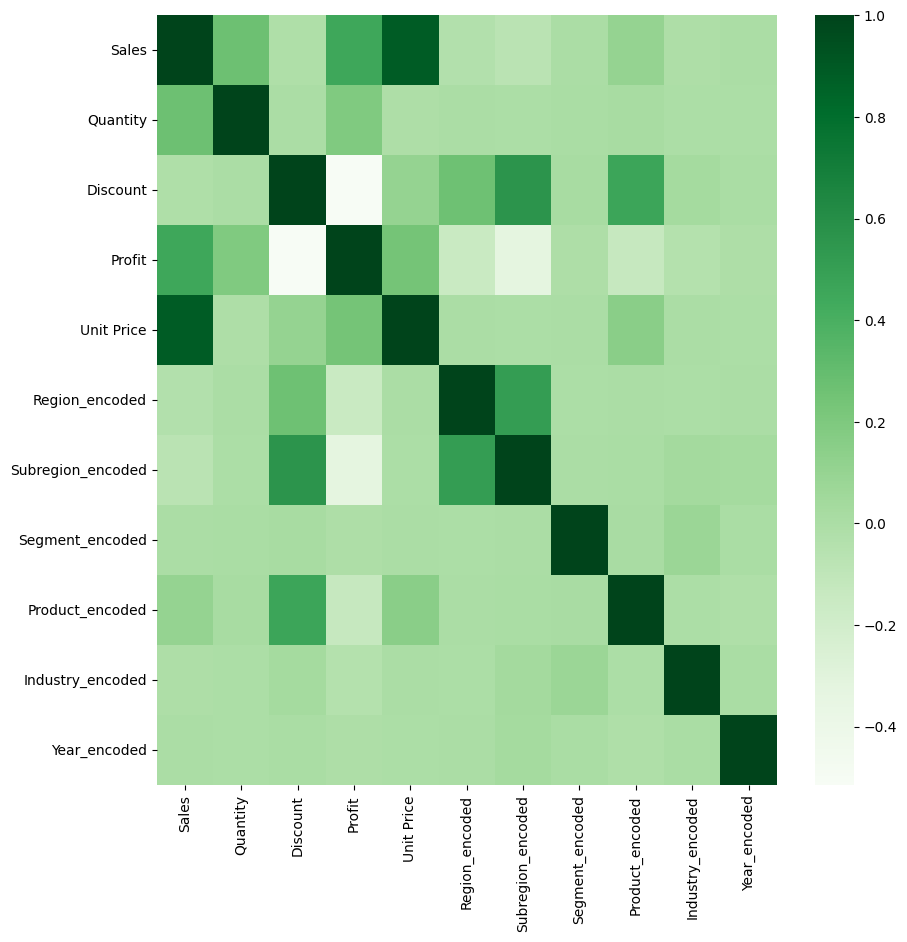

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), cmap='Greens')

### LinearRegression 

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
x= df1.drop('Discount',axis=1)
y=df1['Discount']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred= lr.predict(x_test)
y_pred

array([0.15598912, 0.08176487, 0.25426642, ..., 0.39146251, 0.11550145,
       0.30741735])

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model, metrics
r2_score = metrics.r2_score(y_test, y_pred) 
r2_score

0.6520412201895498

In [25]:
# MSE
mean_squared_error(y_test, y_pred)

0.008911367678405254

In [26]:
# Coefficients
lr.coef_

array([ 3.37891188e-05,  4.67230706e-03, -2.01912873e-03,  3.76315610e-04,
       -1.17471218e-01,  6.39988909e-01,  3.27114506e+01,  7.20126521e-01,
       -6.84092132e-02, -6.97313335e-01])

In [27]:
# Adjusted R2 score
Adj_r2 = 1 - ((1 - r2_score) * (len(y_test) - 1)) / (len(y_test) - 10 - 1)
Adj_r2

0.650290924516459

In [ ]:
# sns.pairplot(data=df1, diag_kind= "kde" )

In [28]:
df1.head()

,Sales,Quantity,Discount,Profit,Unit Price,Region_encoded,Subregion_encoded,Segment_encoded,Product_encoded,Industry_encoded,Year_encoded
0,261.960,2.0,0.00,41.913600,110.0232,0.141372,0.049250,0.158141,0.211140,0.159947,0.154698
1,498.930,3.0,0.00,70.816875,131.0946,0.141372,0.049250,0.158141,0.132518,0.159947,0.154698
2,14.620,2.0,0.00,6.871400,3.8743,0.109359,0.071001,0.158228,0.132518,0.159947,0.154698
3,498.930,5.0,0.45,-39.724125,131.0946,0.141372,0.213662,0.158141,0.303617,0.159947,0.155609
4,22.368,2.0,0.20,2.516400,9.9258,0.141372,0.213662,0.158141,0.074704,0.159947,0.155609


In [29]:
df1.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Unit Price',
       'Region_encoded', 'Subregion_encoded', 'Segment_encoded',
       'Product_encoded', 'Industry_encoded', 'Year_encoded'],
      dtype='object')

# End Line ---------------